In [1]:
%matplotlib inline
import matplotlib.pylab as plt
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from utilities import regressionSummary, printConfusionMatrix

In [8]:
DATA = Path('.').resolve()
wine_df = pd.read_csv(DATA / 'Wine.csv')
wine_df.head()

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


a. Conduct a principal component analysis on the original data. Interpret the results. Explain why the value for PC1 is so much greater than that of any other column. (13 points)

In [42]:
pcs = PCA()
pcs.fit(wine_df.iloc[:, 1:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,314.9632,13.1353,3.0722,2.2341,1.1085,0.9171,0.5282,0.3891,0.3348,0.2678,0.1938,0.1452,0.0906
Proportion of variance,0.9981,0.0017,0.0001,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Cumulative proportion,0.9981,0.9998,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


By conducting PCA on the original data, we can see PC1 is much greater than any other columns. So we take a look at each column's mean and std. By taking a look at the first columns comparing to other columns, we can see from the mean and std, it is obviously leading to this result. A solution is to normalize the data before performing the PCA. The effect of this normalization is to give all variables equal importance in terms of variability.

In [43]:
wine_df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


b. Now perform PCA on the normalized data (only the numerical variables), and generate PC scores. Create a scatterplot of PC1 vs. PC2 scores (use pandas plot.scatter() data frame method), color-coded by Wine Type. Is the information in PC1 and PC2 identical to the information in Wine Type? Can PC scatter plot help reveal groupings of wines and unusual wines? (16 points) 

In [36]:
pcs.fit(preprocessing.scale(wine_df.iloc[:, 1:].dropna(axis=0)))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)
print(pcsSummary_df)
pca_wine_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, index=wine_df.iloc[:, 1:].columns)
pca_wine_df

                             PC1       PC2       PC3       PC4       PC5  \
Standard deviation      2.175417  1.584639  1.205920  0.961335  0.926309   
Proportion of variance  0.361988  0.192075  0.111236  0.070690  0.065633   
Cumulative proportion   0.361988  0.554063  0.665300  0.735990  0.801623   

                             PC6       PC7       PC8       PC9      PC10  \
Standard deviation      0.803295  0.744407  0.592002  0.538992  0.502315   
Proportion of variance  0.049358  0.042387  0.026807  0.022222  0.019300   
Cumulative proportion   0.850981  0.893368  0.920175  0.942397  0.961697   

                            PC11      PC12      PC13  
Standard deviation      0.476513  0.411975  0.322431  
Proportion of variance  0.017368  0.012982  0.007952  
Cumulative proportion   0.979066  0.992048  1.000000  


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,0.144329,-0.483652,-0.207383,-0.017856,-0.265664,-0.213539,-0.056396,-0.396139,0.508619,0.211605,-0.225917,-0.266286,0.014970
Malic_Acid,-0.245188,-0.224931,0.089013,0.536890,0.035214,-0.536814,0.420524,-0.065827,-0.075283,-0.309080,0.076486,0.121696,0.025964
Ash,-0.002051,-0.316069,0.626224,-0.214176,-0.143025,-0.154475,-0.149171,0.170260,-0.307694,-0.027125,-0.498691,-0.049622,-0.141218
Ash_Alcalinity,-0.239320,0.010591,0.612080,0.060859,0.066103,0.100825,-0.286969,-0.427970,0.200449,0.052799,0.479314,-0.055743,0.091683
Magnesium,0.141992,-0.299634,0.130757,-0.351797,0.727049,-0.038144,0.322883,0.156361,0.271403,0.067870,0.071289,0.062220,0.056774
Total_Phenols,0.394661,-0.065040,0.146179,0.198068,-0.149318,0.084122,-0.027925,0.405934,0.286035,-0.320131,0.304341,-0.303882,-0.463908
Flavanoids,0.422934,0.003360,0.150682,0.152295,-0.109026,0.018920,-0.060685,0.187245,0.049578,-0.163151,-0.025694,-0.042899,0.832257
Nonflavanoid_Phenols,-0.298533,-0.028779,0.170368,-0.203301,-0.500703,0.258594,0.595447,0.233285,0.195501,0.215535,0.116896,0.042352,0.114040
Proanthocyanins,0.313429,-0.039302,0.149454,0.399057,0.136860,0.533795,0.372139,-0.368227,-0.209145,0.134184,-0.237363,-0.095553,-0.116917
Color_Intensity,-0.088617,-0.529996,-0.137306,0.065926,-0.076437,0.418644,-0.227712,0.033797,0.056218,-0.290775,0.031839,0.604222,-0.011993


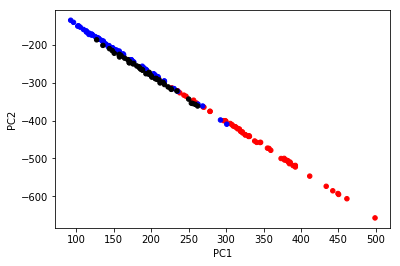

In [37]:
scores = pd.DataFrame(pcs.transform(wine_df.iloc[:, 1:]), columns=pcsSummary_df.columns)
colorMap = {'A': 'red', 'B': 'blue', 'C': 'black'}
scores.plot.scatter(x='PC1', y='PC2', c=[colorMap[t] for t in wine_df.Type])

From the above scatter plot, The information in PC1 and PC2 can help reveal groupings of wines and unusual wines. 
The type red A wine is in one cluster of area which is seperated from other types of wines.